In [19]:
import keras

#Cargue el conjunto de datos fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist




In [20]:
# Cargue la division de entrenamiento y prueba del conjunto de datos fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42 

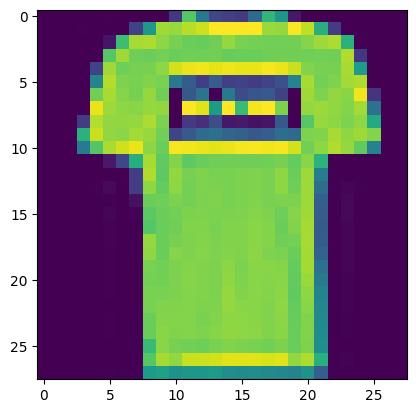

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# puedes poner aqui entre 0 y 5999
index= 1

#imprime la etiqueta y la imagen.
np.set_printoptions(linewidth=320)
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

#visualiza la imagen
plt.imshow(training_images[index])


In [22]:
#Normalizar los valores de pixeles del tren y probar las imagenes.
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [23]:
#construir el modelo de clasificación.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [24]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4953 - accuracy: 0.8243
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3744 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3366 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3109 - accuracy: 0.8850
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2929 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2789 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2551 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2456 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.236

<Axes: >

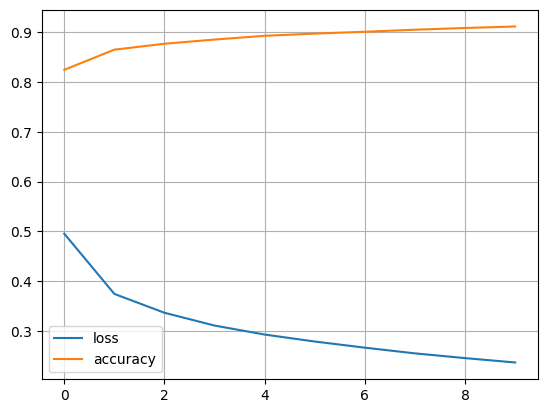

In [26]:
#Graficar el historial de entrenamiento:
import pandas as pd # Import the pandas library

pd.DataFrame(history.history).plot(grid=True)

In [27]:
#Evaluar el mdoelo en el conjuntod en entrenamiento

loss,acuaracy = model.evaluate(training_images, training_labels)
print(f'perdida en el conjunto de entrenamiento: {loss}')
print(f'Precision en el conjunto de entrenamiento: {acuaracy}')

1875/1875 [==============================] - 3s 2ms/step - loss: 0.2297 - accuracy: 0.9159
perdida en el conjunto de entrenamiento: 0.22970446944236755
Precision en el conjunto de entrenamiento: 0.9159166812896729


In [28]:
#Evaluar el mdoelo en el conjuntod en entrenamiento

loss,acuaracy = model.evaluate(test_images, test_labels)
print(f'perdida en el conjunto de entrenamiento: {loss}')
print(f'Precision en el conjunto de entrenamiento: {acuaracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8806
perdida en el conjunto de entrenamiento: 0.34732845425605774
Precision en el conjunto de entrenamiento: 0.8805999755859375


In [29]:
#predict
index=1
print(f'LABEL: {test_labels[index]}')
classification= model.predict(test_images[index:index+1])
print(f'classification:\n {classification.reshape(-1,1)}')

LABEL: 2
1/1 [==============================] - 0s 59ms/step
classification:
 [[3.00537135e-06]
 [4.97904929e-12]
 [9.98032987e-01]
 [1.09987045e-13]
 [1.94527104e-03]
 [8.38149266e-14]
 [1.86601446e-05]
 [2.16334346e-16]
 [9.93836870e-12]
 [5.38952021e-13]]
